In [1]:
import sys


In [2]:
#sys.path.append("/home/edixon1/GillesPy2/gillespy2")
#sys.path.append("/Users/ghilman/Documents/Coding/repo/GillesPy2")
sys.path.append("/home/dalton/environments/Gillespy2/Repository/gillespy2")

In [1]:
sys.path


In [22]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [23]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

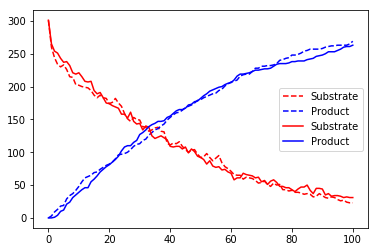

In [61]:
import pyximport
from optimized_ssa_solver import SSASolver
model = MichaelisMenten()
results = model.run(show_labels=False)
dresults = model.run(solver=SSASolver, show_labels=False)
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [9]:
import time
from optimized_ssa_solver import SSASolver
from cython_ssa_solver import CythonSSASolver
from gillespySolver import StochKitSolver
from basic_ssa_solver import BasicSSASolver
import numpy as np
log2_trajectories_max = 10
loops = 10
solvers = [StochKitSolver, CythonSSASolver, SSASolver, BasicSSASolver]
timing_data = np.zeros((log2_trajectories_max+1,len(solvers)+1))
for n in range(0,log2_trajectories_max+1):
    timing_data[n, 0] = 2**n
    for i in range(loops):
        for solver in range(len(solvers)):
            time_start = time.perf_counter()
            model.run(solver=solvers[solver], show_labels=False, number_of_trajectories=2**n)
            time_end = time.perf_counter()
            timing_data[n, solver+1] += (time_end - time_start)/loops
    print(timing_data[n,:])
print(timing_data)

[ 1.          0.03114332  0.0163109   0.06519375  0.14622854]
[ 2.          0.03589351  0.02934342  0.13194943  0.29183589]
[ 4.          0.0442563   0.04821284  0.25012081  0.54560051]
[ 8.          0.05451091  0.09389615  0.49748592  1.0987252 ]
[ 16.           0.07246646   0.18675442   1.00770028   2.19998183]
[ 32.           0.10116437   0.37889651   2.02891      4.41796477]
[ 64.           0.15929867   0.79475327   4.04948668   8.89018773]
[ 128.            0.28340418    1.58484661    8.11157171   17.65497785]
[ 256.            0.52858962    3.11717743   16.13047945   35.09480811]
[ 512.            1.0228029     6.21764099   32.37032449   70.40754895]
[ 1024.             2.01550011    12.47175964    64.79399724   141.6855985 ]
[[  1.00000000e+00   3.11433235e-02   1.63108953e-02   6.51937519e-02
    1.46228538e-01]
 [  2.00000000e+00   3.58935094e-02   2.93434247e-02   1.31949433e-01
    2.91835894e-01]
 [  4.00000000e+00   4.42562959e-02   4.82128373e-02   2.50120814e-01
    5.45

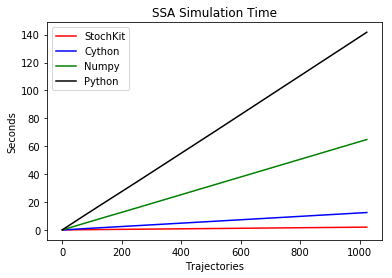

In [78]:
plt.plot(timing_data[:,0],timing_data[:,1],'-r', label='StochKit')
plt.plot(timing_data[:,0],timing_data[:,2],'-b', label='Cython')
plt.plot(timing_data[:,0],timing_data[:,3],'-g', label='Numpy')
plt.plot(timing_data[:,0],timing_data[:,4],'-k', label='Python')
plt.title("SSA Simulation Time")
plt.ylabel("Seconds")
plt.xlabel("Trajectories")
plt.legend(loc='best')
plt.savefig("SSA_Comparisons3.png")